# univariate linear regression example

a simple example of linear regression with gradient descent.

the goal of this is to map a set of input data (single-variable) to a set of continuous-valued output data by finding a linear function that best approximates the distribution. this can be used to map data such as floor space to house price, age to cancer risk, etc.

a good understanding of this algorithm is the basis for understanding neural networks (via linear regression > multivariate linear regression > logistic regression > multivariate logistic regression > multi-layer perceptrons) and gradient descent-based optimization.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## input some data

we will try to predict the temperature in degrees C (y) from # of cricket chirps/sec (x).

temperature data is in Fahrenheit so let's convert to Celcius for understandability

this is from _The Song of Insects_ by Dr. G.W. Pierce, Harvard College Press.

dataset available online:
http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [2]:
def tocelsius(f):
    c = (f - 32) * 5/9
    return c

In [3]:


# these are the true cricket chirps recorded
x = np.array([
        20, 
        16, 
        19.79999924, 
        18.39999962, 
        17.10000038, 
        15.5, 
        14.69999981,
        17.10000038, 
        15.39999962, 
        16.20000076, 
        15, 
        17.20000076, 
        16, 
        17, 
        14.39999962])

# this is the temperature readings
y_fahr = [
        88.59999847,
        71.59999847,
        93.30000305,
        84.30000305,
        80.59999847,
        75.19999695,
        69.69999695,
        82,
        69.40000153,
        83.30000305,
        79.59999847,
        82.59999847,
        80.59999847,
        83.5,
        76.30000305]

# these are the temps in celsius
y_trues = np.array([tocelsius(t) for t in y_fahr])

## looking at our data

the blue dots on the graph are our data points. they look like they follow a linear function, but in reality, we don't know what this underlying function is. we are *assuming* that such a function exists, and furthermore, we are assuming that it is a *linear function*.

as you know, we can represent such a function in the good old `y = mx + b` form

our goal is to find the parameters `m`, `b` of this function. by finding this underlying representation, we can make new predictions mapping new `x` -> `y`.

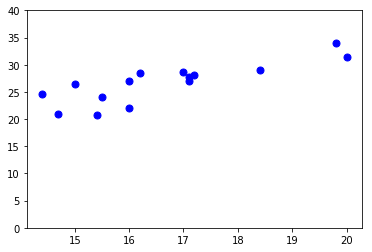

In [4]:
plt.ylim((0, 40))
plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)

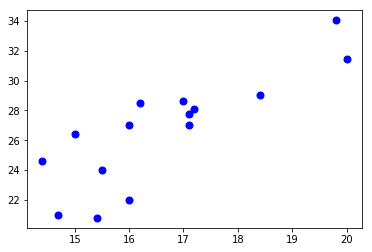

In [5]:
# here is the graph, with y-axis not set from zero
plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)

## Gradient Descent

gradient descent depends on a `cost` or `error function` which measures how 'wrong' we are. We want to *maximize* the correctness of our predictions, so we want *minimize* our error.

if we can calculate the `gradient` of our error function (the "slope"), then we know that adjusting our parameters so that we move *downwards* (descend) the slope, our error will be smaller. hence, "gradient descent". 

the following is a plot of the error wrt the `m` and `b`:

![MSE loss function](https://ml4a.github.io/images/figures/lin_reg_mse.png)
*from https://ml4a.github.io/ml4a/how_neural_networks_are_trained/*

we define the loss function; here we can use *least squares* or *mean squared error* (squaring means we have absolute values, so too-high and too-low examples don't cancel each other out):

`Mean Squared Error (MSE) = 1/2m * Sum(Predicted – Actual)^2`

note that there are a lot of minor variations in representation; the 1/2 is merely added for 'nicer' math (see Andrew Ng).

this function gives us some very convenient partial derivatives:

(see the math stackexchange link below for derivation where `theta_1` = `m` and `theta_0` = `b`)

`*d*MSE / *d*m = 1/m sum ((y_pred - y_true) * x)`

`*d*MSE / *d*b = 1/m sum (y_pred - y_true)`

see this link for more details:
http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#cost-function

so our steps will be:

1. randomly initialize our initial parameters (here `m` and `b`)
2. calculate the total error when making predictions using this model
3. calculate the gradient and adjust our `m` and `b` accordingly
4. use these parameters to make new predictions
5. repeat until there is no more (significant) improvement ("convergence")

## note on hyperparameters

## learning rate

when we update our parameters, we subtract the partial derivative from the current value (to imagine, let's say our predictions are too low, so sum of `y_pred - y_true` is negative. we want to shift our line *up* = *increasing* the bias value `b`. so subtracting the negative value from `b` means `b` *increases*).

but if we subtract the entire sum, this means we are taking a *giant* "step" down our cost function. we might miss the real minimum entirely. so we should step a *fraction* of that distance. that fraction is our *learning rate*. but if we take steps that are *too* small, it will take a long time to find the minimum. so learning rate tuning is important:

![learning rate in GD](https://cdn-images-1.medium.com/max/800/1*_EEOl5h56T2ZcXzH-Egahg.png)  
*from https://medium.com/ai-society/hello-gradient-descent-ef74434bdfa5*

## tolerance & early stopping

we are trying to minimize the loss function, but we will probably never get it *exactly* 0. as we get closer to the bottom, our error will stop changing significantly, so by setting our *tolerance*, we can stop the model when the *change* in error from iteration to iteration is below this threshold.

we will also use a value to fix the maximum iterations.

In [6]:
# model "hyperparameters" (parameters set outside the model)
lr = 0.001
tol = 1e-2 # we can use scientific notation like this: = 0.01
max_iters = 100

# plot graph every n iters
graph_iters = 1

iteration: 0
error: 725.2563786991374
mhat: 0.44940259246459247
bhat: 0.026688888831481482


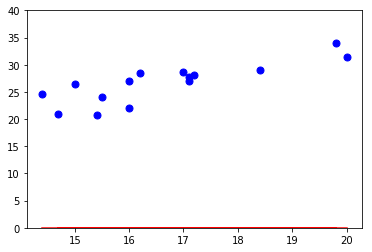

iteration: 1
error: 376.86369244604055
mhat: 0.7725112222467657
bhat: 0.045867037595262034


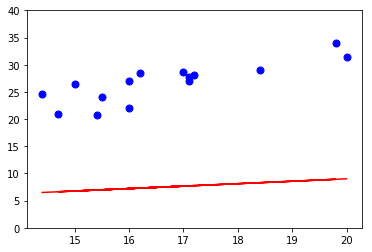

iteration: 2
error: 196.77214298346505
mhat: 1.00481799276766
bhat: 0.05964517249154697


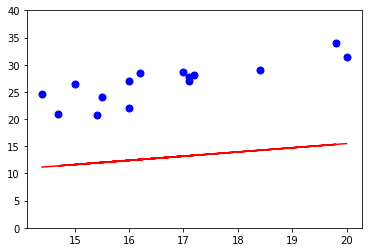

iteration: 3
error: 103.67901074497318
mhat: 1.1718407428144346
bhat: 0.06954084716491844


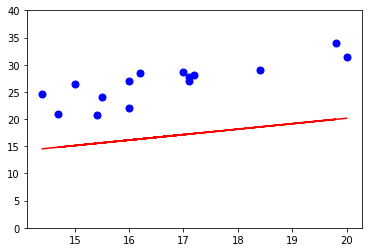

iteration: 4
error: 55.557200410969244
mhat: 1.291926091313586
bhat: 0.07664514063072198


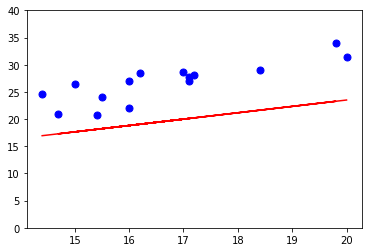

iteration: 5
error: 30.682017525703582
mhat: 1.3782647488437638
bhat: 0.08174250846453275


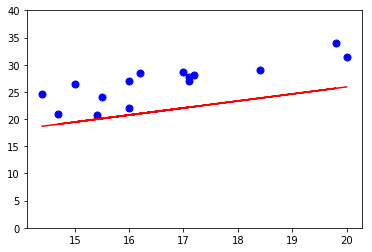

iteration: 6
error: 17.823508041516106
mhat: 1.4403404707642962
bhat: 0.08539695248601353


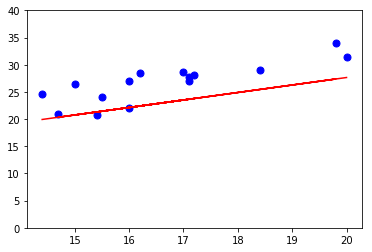

iteration: 7
error: 11.17667119444087
mhat: 1.484971814360578
bhat: 0.0880139743736366


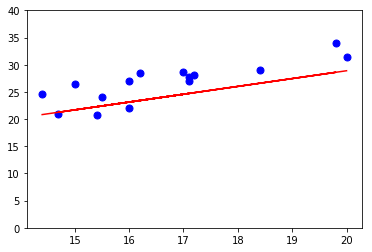

iteration: 8
error: 7.74077931216225
mhat: 1.5170611333619761
bhat: 0.08988511859678332


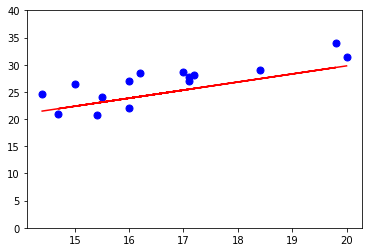

iteration: 9
error: 5.964692794614331
mhat: 1.5401330842437422
bhat: 0.09121999754953046


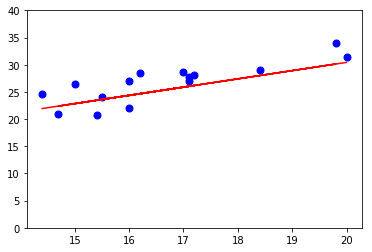

iteration: 10
error: 5.046594775478157
mhat: 1.5567217973347658
bhat: 0.09216931673434828


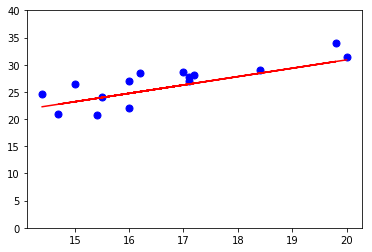

iteration: 11
error: 4.572009157898081
mhat: 1.568649242114594
bhat: 0.0928414292310953


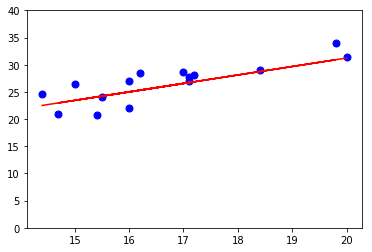

iteration: 12
error: 4.326684481121788
mhat: 1.5772253641478087
bhat: 0.0933142379014611


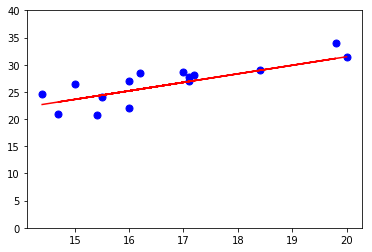

iteration: 13
error: 4.199869633606907
mhat: 1.5833919779935623
bhat: 0.09364375274412143


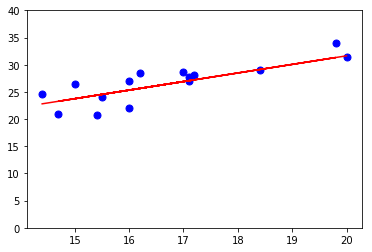

iteration: 14
error: 4.134315023379582
mhat: 1.5878262222199098
bhat: 0.0938702433959497


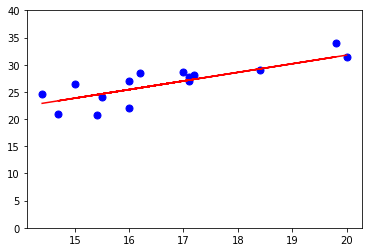

iteration: 15
error: 4.100427125503345
mhat: 1.591014940692123
bhat: 0.0940226626098872


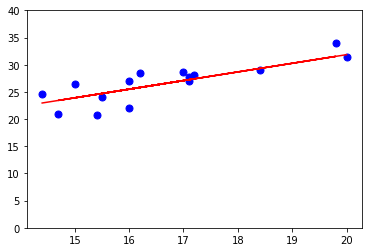

iteration: 16
error: 4.082908421027042
mhat: 1.5933081606577038
bhat: 0.09412182661294645


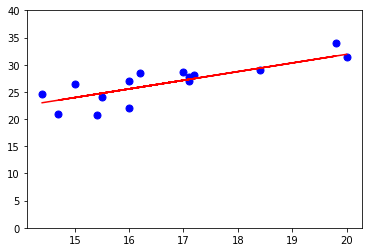

iteration: 17
error: 4.073851298857924
mhat: 1.594957542007498
bhat: 0.09418270169548013


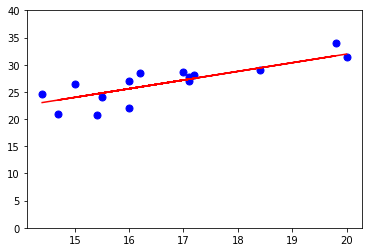

early stop at iter # 17
error: 4.073851298857924
mhat: 1.594957542007498
bhat: 0.09418270169548013


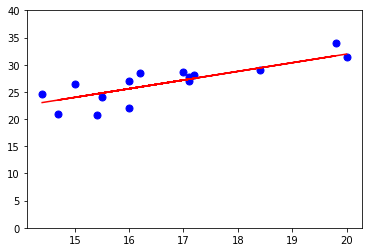

In [7]:
# for educational purposes we will initialize both values to 0
# we call it 'hat' as the '^'  hat is used to denote predictions
m_hat = 0
b_hat = 0

# np.random.seed(123) # fix the random generator, for reproducibility
# m_hat = np.random.random()
# b_hat = np.random.randint(10)

# logs
errors = []

# iterate
for i in range(max_iters):
    # predict using our predicted m, b values
    y_preds = m_hat*x + b_hat
    # calculate the total error when making predictions using this model
    error = np.mean(np.square(np.subtract(y_preds, y_trues)))
    errors.append(error)
    # calculate the gradient (partial derivatives)
    m_grad = np.mean(np.subtract(y_preds, y_trues)*x)
    b_grad = np.mean(np.subtract(y_preds, y_trues))
    # adjust our m and b accordingly
    m_hat -= lr * m_grad
    b_hat -= lr * b_grad

    # plot graphs every n iterations
    if i % (graph_iters) == 0:
        print("iteration:", i)
        print("error:", error)
        print("mhat:", m_hat)
        print("bhat:", b_hat)
        plt.ylim((0, 40))
        plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)
        plt.plot(x, y_preds, color='r')
        plt.show()
    
    
    # until there is no more (significant) improvement ("convergence")
    if len(errors) > 2:
        if abs(errors[-2] - errors[-1]) < tol:
            print("early stop at iter #", i)
            print("error:", error)
            print("mhat:", m_hat)
            print("bhat:", b_hat)
            plt.ylim((0, 40))
            plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)
            plt.plot(x, y_preds, color='r')
            plt.show()
            break

## plotting our errors

as we can see, the algorithm learns to reduce the error whickly at first (the steep part of the slope in the above image) then slowly the improvements begin to diminish as we near the minimum.

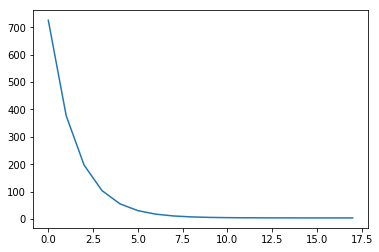

In [8]:
plt.plot(errors)

## using our model to predict

now that we have the parameters tuned, we can predict the temperature based on the cricket chirps we hear.

In [36]:
def predicttemp(chirps):
    temp = m_hat * chirps + b_hat
    return temp

In [37]:
predicttemp(22)

35.183248625860436

## converting the model to sklearn

[[1.82838587]] [-3.75983056]


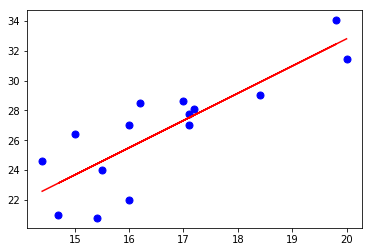

[[36.4646586]]


In [30]:
# import the model
from sklearn.linear_model import LinearRegression

# create an instance of the model class
model = LinearRegression(
    fit_intercept=True, # this means we will also find b
    normalize=False # we didn't normalize the data above
)

# reshape our data to list-of-lists
x_arr = np.array(x).reshape(-1, 1)
y_arr = np.array(y_trues).reshape(-1, 1)
# fit the data
model.fit(x_arr, y_arr)
# get predictions
y_mpreds = model.predict(x_arr)

# print m_hat and b_hat
print(model.coef_, model.intercept_)

# draw graph
plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)
plt.plot(x, y_mpreds.flatten(), color='r')
plt.show()

# prediction 
print(model.predict([[22]]))

1.594957542007498 0.09418270169548013


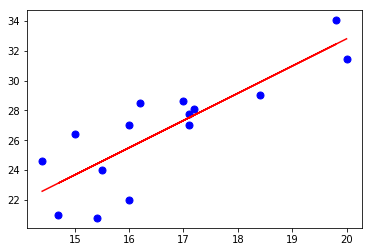

35.183248625860436


In [38]:
# compare to our model
print(m_hat, b_hat)
plt.plot(x, y_trues, color='b', linestyle="None", marker=(0, 3, 0), markersize=7.)
plt.plot(x, y_mpreds.flatten(), color='r')
plt.show()
print(predicttemp(22))

## references and further reading:

Jahnavi Mahanta: Keep it simple! How to understand Gradient Descent algorithm

https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html

Chris McCormick: Gradient Descent Derivation

http://mccormickml.com/2014/03/04/gradient-descent-derivation/

Juan Camilo Bages Prada: Hello, Gradient Descent

https://medium.com/ai-society/hello-gradient-descent-ef74434bdfa5

Stackexchange: Partial derivative in gradient descent for two variables
(see Hendy's response)
https://math.stackexchange.com/questions/70728/partial-derivative-in-gradient-descent-for-two-variables

Roughgarden & Valiant: CS168 Lecture 15: Gradient Descent Basics (handout)

http://theory.stanford.edu/~tim/s15/l/l15.pdf

## what's next:

### multivariate linear regression

we can easily turn this into multivariate linear regression by adding more `x` and `m` values:

`y = m1 * x1 + m2 * x2 + ... + m_n * x_n + b`

... etc. etc. it's more effective to use a `numpy` implementation as the features and datasets get more numerous. also, we can simplify the work by viewing the `bias` term `b` as just another `m`, `m_0`, with associated `x_0` values always set to 1. then instead of worrying about a separate update to the bias term, we can do all feature updates in one operation.

###  stochastic & minibatch gradient descent

instead of updating the parameters after summing over the _whole_ dataset (we did the summation within the `numpy.mean()` operation), we can update them after looking at only one (stochastic GD) or some (minibatch GD) examples instead.

this is beneficial for large datasets with many features, where the matrix operations to calculate the gradient from the whole dataset would be too difficult to compute. furthermore, by updating the parameters multiple times per epoch (one cycle over all the data), the model can learn more per epoch.

### logistic regression

while linear regression predicts a continuous variable, logistic regression is used to *classification*. the behavior of the algorithm is similar, but we use the `sigmoid` or `logistic` function to "squash" our linear function into a range of 0-1 and train it to choose between two classes (class A = `0`, class B = `1`). 

![logistic function](https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_function.png)
*from https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/*

### multi-layer perceptron

what happens when we stack a bunch of multivariate logistic regression classifiers together? well, we get a multi-layer perceptron, a basic neural network!